In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('csvs/cs-training.csv')

In [10]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [11]:
df.shape

(150000, 12)

In [12]:
df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [13]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

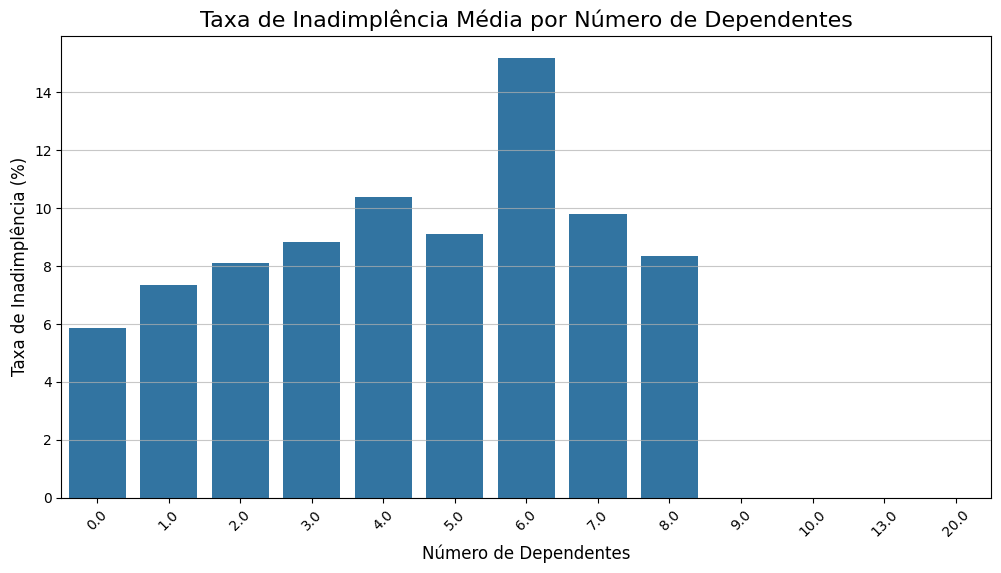

In [ ]:
# a ideia desse gráfico é tentar entender se a variavel NumberOfDependents é irrelevante ou não para prever a inadimplência
inadimplencia_por_qtd_dependentes = df.groupby('NumberOfDependents')['SeriousDlqin2yrs'].mean().reset_index()
inadimplencia_por_qtd_dependentes['TaxaInadimplencia'] = inadimplencia_por_qtd_dependentes['SeriousDlqin2yrs'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='NumberOfDependents', y='TaxaInadimplencia', data=inadimplencia_por_qtd_dependentes)

plt.title('Taxa de Inadimplência Média por Número de Dependentes', fontsize=16)
plt.xlabel('Número de Dependentes', fontsize=12)
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()


/tmp/ipykernel_473634/1108059914.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inadimplencia_por_idade = df.groupby('AgeGroup')['SeriousDlqin2yrs'].mean().reset_index()


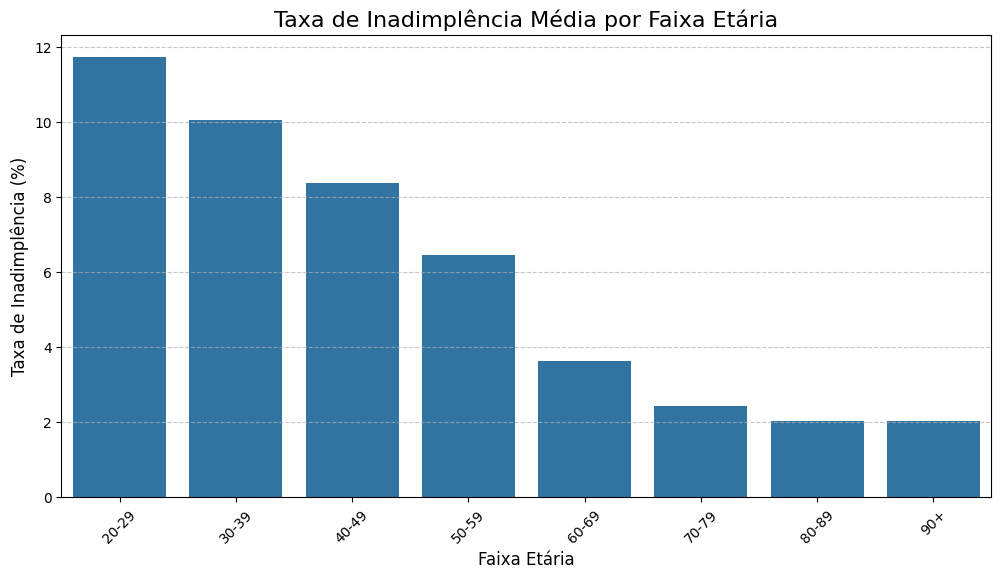

In [ ]:
# a ideia desse gráfico é tentar entender se a variavel age é irrelevante ou não para prever a inadimplência
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 110]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

inadimplencia_por_idade = df.groupby('AgeGroup')['SeriousDlqin2yrs'].mean().reset_index()
inadimplencia_por_idade['TaxaInadimplencia'] = inadimplencia_por_idade['SeriousDlqin2yrs'] * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='TaxaInadimplencia', data=inadimplencia_por_idade)

plt.title('Taxa de Inadimplência Média por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()


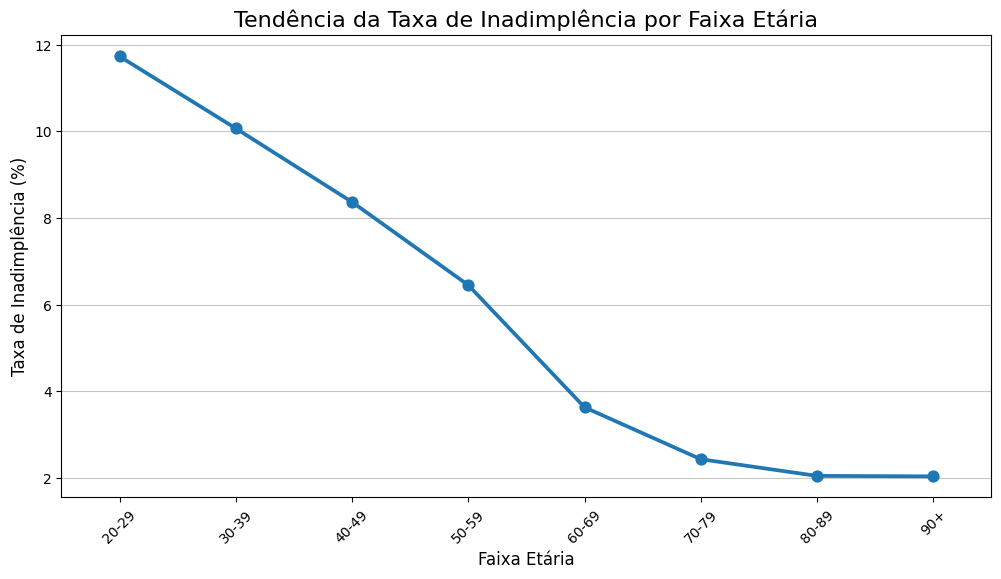

In [ ]:
# plotando outro tipo de gráfico para visualizar a tendencia
plt.figure(figsize=(12, 6))

sns.pointplot(x='AgeGroup', y='TaxaInadimplencia', data=inadimplencia_por_idade)

plt.title('Tendência da Taxa de Inadimplência por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Inadimplência (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

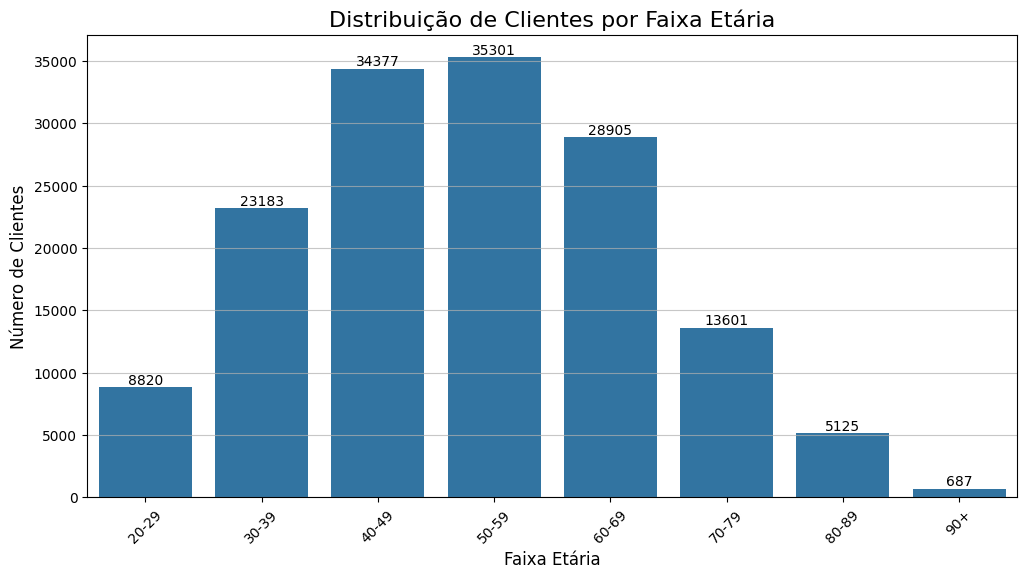

Contagem de clientes por faixa etária:
AgeGroup
20-29     8820
30-39    23183
40-49    34377
50-59    35301
60-69    28905
70-79    13601
80-89     5125
90+        687
Name: count, dtype: int64


In [ ]:
# Tentando ver se a distribuição de idades está balanceada ou de certa forma enviesando a análise
contagem_por_faixa = df['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=contagem_por_faixa.index, y=contagem_por_faixa.values)

plt.title('Distribuição de Clientes por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)

for index, value in enumerate(contagem_por_faixa.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

print(contagem_por_faixa)

### Parte B - Carregando e entendendo os dados

#### B.1. Há correlação entre as variáveis?